In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [96]:
# Select only the required columns
columns = ['engine_displacement', 'horsepower', 'vehicle_weight', 
           'model_year', 'fuel_efficiency_mpg']
df = df[columns]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [97]:
#column with  missing values
missing_values= df.isnull().sum()
missing_values

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [98]:
#median for horsepower
median_hp = df['horsepower'].median()
median_hp

149.0

In [99]:
#setting up validation framework
n = len(df)
n_val=n_test = int(n*.2)
n_train = int(n - (n_test+n_val))
n, n_train, n_test, n_val

(9704, 5824, 1940, 1940)

In [100]:
#shuffling the array
np.random.seed(42) #asked to seed 42
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]
df_shuffled

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5734,210,163.0,1972.029124,2011,19.961672
5191,160,126.0,3011.588014,2009,14.651056
5390,290,187.0,2440.508039,2019,18.404435
860,260,129.0,1865.404480,2019,20.502460


In [101]:
#.copy can be used for a copy instead of the original df
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

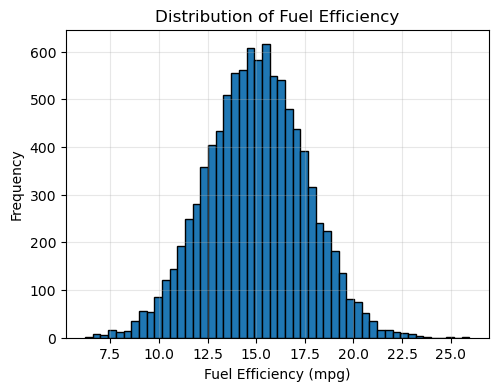

In [102]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(df['fuel_efficiency_mpg'], bins=50, edgecolor='black')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency')
plt.grid(True, alpha=0.3)


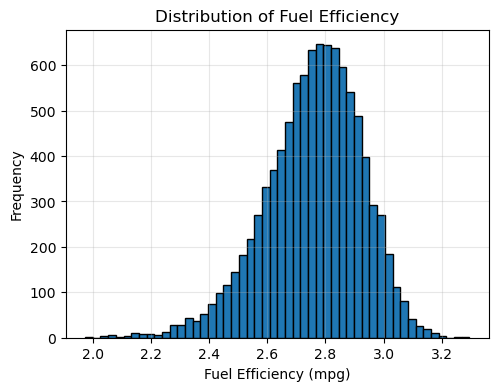

In [104]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(np.log1p(df['fuel_efficiency_mpg']), bins=50, edgecolor='black')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency')
plt.grid(True, alpha=0.3)

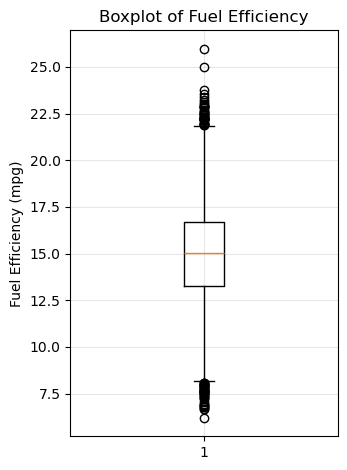

In [103]:
plt.subplot(1, 2, 2)
plt.boxplot(df['fuel_efficiency_mpg'])
plt.ylabel('Fuel Efficiency (mpg)')
plt.title('Boxplot of Fuel Efficiency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fuel_efficiency_distribution.png')


In [105]:
#prepare the target variable and apply logarithmic function
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values


In [106]:
# Remove target from features
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

LINEAR REGRESSION


In [107]:
def train_linear_regression(X_train, y_train):
    """Train linear regression without regularization"""
    ones = np.ones(X_train.shape[0])
    X_train_with_bias = np.column_stack([ones, X_train])
    
    XTX = X_train_with_bias.T.dot(X_train_with_bias)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X_train_with_bias.T).dot(y_train)
    
    return w


In [108]:
def predict(X, w):
    """Make predictions"""
    ones = np.ones(X.shape[0])
    X_with_bias = np.column_stack([ones, X])
    return X_with_bias.dot(w)

In [109]:
def rmse(y_true, y_pred):
    """Calculate RMSE"""
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [121]:
#Fill with 0
df_train_fill_0 = df_train.fillna(0)
df_val_fill_0 = df_val.fillna(0)

w_0 = train_linear_regression(df_train_fill_0.values, y_train)
y_pred_0 = predict(df_val_fill_0.values, w_0)
rmse_fill_0 = rmse(y_val, y_pred_0)

with_zero = round(rmse_fill_0, 2)
with_zero

0.52

In [111]:
# Option 2: Fill with mean (computed from training set only)
missing_col = missing_values[missing_values > 0].index[0]
mean_value = df_train[missing_col].mean()
print(f"Mean of '{missing_col}' in training set: {mean_value:.2f}")

df_train_fill_mean = df_train.fillna(mean_value)
df_val_fill_mean = df_val.fillna(mean_value)

w_mean = train_linear_regression(df_train_fill_mean.values, y_train)
y_pred_mean = predict(df_val_fill_mean.values, w_mean)
rmse_fill_mean = rmse(y_val, y_pred_mean)
round(rmse_fill_mean, 2)

Mean of 'horsepower' in training set: 149.54


0.46

In [123]:
#regularization
def train_linear_regression_reg(X_train, y_train, r=0.0):
    """Train linear regression with regularization"""
    ones = np.ones(X_train.shape[0])
    X_train_with_bias = np.column_stack([ones, X_train])
    
    XTX = X_train_with_bias.T.dot(X_train_with_bias)
    reg_matrix = r * np.eye(XTX.shape[0])
    XTX_reg = XTX + reg_matrix
    XTX_inv = np.linalg.inv(XTX_reg)
    w = XTX_inv.dot(X_train_with_bias.T).dot(y_train)
    
    return w

In [113]:
# Fill with 0 
df_train_q4 = df_train.fillna(0)
df_val_q4 = df_val.fillna(0)



In [122]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    w = train_linear_regression_reg(df_train_q4.values, y_train, r=r)
    y_pred = predict(df_val_q4.values, w)
    rmse_val = rmse(y_val, y_pred)
    rmse_scores[r] = round(rmse_val, 2)
    print(f"r = {r:6}: RMSE = {rmse_scores[r]}")



r =      0: RMSE = 0.52
r =   0.01: RMSE = 0.52
r =    0.1: RMSE = 0.52
r =      1: RMSE = 0.52
r =      5: RMSE = 0.52
r =     10: RMSE = 0.52
r =    100: RMSE = 0.52


In [115]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for seed in seeds:
    np.random.seed(seed)

# Shuffle
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled_seed = df.iloc[idx].reset_index(drop=True)
    
    # Split
    df_train_seed = df_shuffled_seed.iloc[:n_train].copy()
    df_val_seed = df_shuffled_seed.iloc[n_train:n_train+n_val].copy()
    
    # Prepare data
    y_train_seed = df_train_seed['fuel_efficiency_mpg'].values
    y_val_seed = df_val_seed['fuel_efficiency_mpg'].values
    
    X_train_seed = df_train_seed.drop('fuel_efficiency_mpg', axis=1).fillna(0)
    X_val_seed = df_val_seed.drop('fuel_efficiency_mpg', axis=1).fillna(0)
    
    # Train and evaluate
    w = train_linear_regression(X_train_seed.values, y_train_seed)
    y_pred = predict(X_val_seed.values, w)
    rmse_val = rmse(y_val_seed, y_pred)
    rmse_list.append(rmse_val)
    print(f"Seed {seed}: RMSE = {rmse_val:.4f}")


Seed 0: RMSE = 0.5207
Seed 1: RMSE = 0.5213
Seed 2: RMSE = 0.5228
Seed 3: RMSE = 0.5160
Seed 4: RMSE = 0.5109
Seed 5: RMSE = 0.5283
Seed 6: RMSE = 0.5314
Seed 7: RMSE = 0.5091
Seed 8: RMSE = 0.5147
Seed 9: RMSE = 0.5132


In [116]:
std_rmse = np.std(rmse_list)
print(f"Standard deviation of RMSE: {round(std_rmse, 5)}")

Standard deviation of RMSE: 0.00699


In [117]:
# Split with seed 9
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled_9 = df.iloc[idx].reset_index(drop=True)

df_train_9 = df_shuffled_9.iloc[:n_train].copy()
df_val_9 = df_shuffled_9.iloc[n_train:n_train+n_val].copy()
df_test_9 = df_shuffled_9.iloc[n_train+n_val:].copy()


In [118]:
# Combine train and validation
df_train_val = pd.concat([df_train_9, df_val_9]).reset_index(drop=True)

In [119]:
# Prepare data
y_train_val = df_train_val['fuel_efficiency_mpg'].values
y_test_9 = df_test_9['fuel_efficiency_mpg'].values

X_train_val = df_train_val.drop('fuel_efficiency_mpg', axis=1).fillna(0)
X_test_9 = df_test_9.drop('fuel_efficiency_mpg', axis=1).fillna(0)


In [124]:
# Train with r=0.001
w_final = train_linear_regression_reg(X_train_val.values, y_train_val, r=0.001)
y_pred_test = predict(X_test_9.values, w_final)
rmse_test = rmse(y_test_9, y_pred_test)
print(f"\nRMSE on test set (r=0.001): {round(rmse_test, 5)}")





RMSE on test set (r=0.001): 0.51563


In [125]:
X =[
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 83],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],  
]

In [130]:
X =np.array(X)

In [137]:
xtx=X.T.dot(X)
xtx


array([[ 696471,   44115,  717301],
       [  44115,    7146,  118770],
       [ 717301,  118770, 6359479]])

In [142]:
xtx_inv = np.linalg.inv(xtx)
print(xtx_inv.dot(xtx).round(1))

[[ 1. -0. -0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]


In [5]:
import numpy as np
np.eye(3)*0.01

array([[0.01, 0.  , 0.  ],
       [0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.01]])

In [6]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

In [7]:
XTX = XTX + 0.01*np.eye(3)
XTX

array([[1.01     , 2.       , 2.       ],
       [2.       , 1.01     , 1.0000001],
       [2.       , 1.0000001, 1.01     ]])